# Q1 - Decision tree - Entropy Vs. Gini impurity

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [5]:
# health data 
d = [[1,'Yes','Male',160,'High','No'],
     [2,'Yes','Male',260,'Normal','Yes'],
     [3,'No','Female',245,'Normal','No'],
     [4,'No','Male',170,'Normal','No'],
     [5,'Yes','Female',230,'High','Yes'],
     [6,'No','Male',215,'Normal','No'],
     [7,'Yes','Female',240,'Normal','No'],
     [8,'No','Male',235,'High','Yes']]

df = pd.DataFrame(data = np.array(d),
                    columns = ['ID','Family heart attacks','Gender','cholesterol','Blood pressure','Heart attack'])

In [6]:
df

,ID,Family heart attacks,Gender,cholesterol,Blood pressure,Heart attack
0,1,Yes,Male,160,High,No
1,2,Yes,Male,260,Normal,Yes
2,3,No,Female,245,Normal,No
3,4,No,Male,170,Normal,No
4,5,Yes,Female,230,High,Yes
5,6,No,Male,215,Normal,No
6,7,Yes,Female,240,Normal,No
7,8,No,Male,235,High,Yes


## a

In [7]:
def entropy_per_attribute(df,attribute,lable,target):
    if df[df[attribute] == lable].groupby(target).count().index[0] == 'No':
        count = df[df[attribute] == lable].groupby(target).count().ID['No']
    else:
        count = 0
    total = df[df[attribute] == lable].groupby(target).count().ID.sum()
    entropy = -(count/total)*np.log2(count/total)-((total-count)/total)*np.log2((total-count)/total)
    return total,entropy    

In [8]:
# General - Entropy of heart attack
df['Heart attack'].value_counts()

No     5
Yes    3
Name: Heart attack, dtype: int64

In [9]:
# Entropy of heart attack
Entropy_HA = -(5/8)*np.log2(5/8) -(3/8)*np.log2(3/8)
Entropy_HA

0.954434002924965

In [10]:
# for 3 binary columns:
cols = ['Family heart attacks','Gender','Blood pressure']

In [11]:
results = []
for i,c in enumerate(cols):
    lables = df[cols[i]].unique()
    for l in lables:
        results.append([c,l,entropy_per_attribute(df,c,l,'Heart attack')])

In [15]:
results

[['Family heart attacks', 'Yes', (4, 1.0)],
 ['Family heart attacks', 'No', (4, 0.8112781244591328)],
 ['Gender', 'Male', (5, 0.9709505944546686)],
 ['Gender', 'Female', (3, 0.9182958340544896)],
 ['Blood pressure', 'High', (3, 0.9182958340544896)],
 ['Blood pressure', 'Normal', (5, 0.7219280948873623)]]

In [19]:
results[0][2][0]

4

In [221]:
# Gains
display('Family heart attacks:')
Entropy_HA - (results[0][2][0]/8)*results[0][2][1] - (results[1][2][0]/8)*results[1][2][1] #'Family heart attacks'
display('Gender:')
Entropy_HA - (results[2][2][0]/8)*results[2][2][1] - (results[3][2][0]/8)*results[3][2][1] #'Gender'
display('Blood pressure:')
Entropy_HA - (results[4][2][0]/8)*results[4][2][1] - (results[5][2][0]/8)*results[5][2][1] #'Blood pressure'

'Family heart attacks:'

0.048794940695398636

'Gender:'

0.003228943620363578

'Blood pressure:'

0.15886800584993

In [222]:
# for the cholesterol column:
def entropy_per_continues_attribute_bigger(df,attribute,threshold,target):
    if np.shape(df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count())[0] == 0 or np.shape(df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count())[1]==0:
        count = 0
    elif df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count().index[0] == 'No':
        count = df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count().ID['No']
    else:
        count = 0
    total = df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count().ID.sum()
    entropy = -(count/total)*np.log2(count/total)-((total-count)/total)*np.log2((total-count)/total)
    if np.isnan(entropy):
        entropy=0
    return total,entropy

def entropy_per_continues_attribute_smaller(df,attribute,threshold,target):
    if np.shape(df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count())[0] == 0 or np.shape(df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count())[1]==0:
        count = 0
    elif df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count().index[0] == 'No':
        count = df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count().ID['No']
    else:
        count = 0
    total = df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count().ID.sum()
    entropy = -(count/total)*np.log2(count/total)-((total-count)/total)*np.log2((total-count)/total)
    if np.isnan(entropy):
        entropy=0
    return total,entropy

In [223]:
threshold_values = [160,170,260,230,215,240,235,245]

In [224]:
results_cholesterol = []
for thr in threshold_values:
    results_cholesterol.append(['bigger',thr,entropy_per_continues_attribute_bigger(df,'cholesterol',thr,'Heart attack')])
    results_cholesterol.append(['smaller',thr,entropy_per_continues_attribute_smaller(df,'cholesterol',thr,'Heart attack')])
    

In [225]:
results_cholesterol

[['bigger', 160, (7, 0.9852281360342515)],
 ['smaller', 160, (1, 0)],
 ['bigger', 170, (6, 1.0)],
 ['smaller', 170, (2, 0)],
 ['bigger', 260, (0, 0)],
 ['smaller', 260, (8, 0.954434002924965)],
 ['bigger', 230, (4, 1.0)],
 ['smaller', 230, (4, 0.8112781244591328)],
 ['bigger', 215, (5, 0.9709505944546686)],
 ['smaller', 215, (3, 0)],
 ['bigger', 240, (2, 1.0)],
 ['smaller', 240, (6, 0.9182958340544896)],
 ['bigger', 235, (3, 0.9182958340544896)],
 ['smaller', 235, (5, 0.9709505944546686)],
 ['bigger', 245, (1, 0)],
 ['smaller', 245, (7, 0.863120568566631)]]

In [226]:
# Gains
'160:'
Entropy_HA - (results_cholesterol[0][2][0]/8)*results_cholesterol[0][2][1] - (results_cholesterol[1][2][0]/8)*results_cholesterol[1][2][1] #160
'170:'
Entropy_HA - (results_cholesterol[2][2][0]/8)*results_cholesterol[2][2][1] - (results_cholesterol[3][2][0]/8)*results_cholesterol[3][2][1] #170
'260:'
Entropy_HA - (results_cholesterol[4][2][0]/8)*results_cholesterol[4][2][1] - (results_cholesterol[5][2][0]/8)*results_cholesterol[5][2][1] #260
'230:'
Entropy_HA - (results_cholesterol[6][2][0]/8)*results_cholesterol[6][2][1] - (results_cholesterol[7][2][0]/8)*results_cholesterol[7][2][1] #230
'215:'
Entropy_HA - (results_cholesterol[8][2][0]/8)*results_cholesterol[8][2][1] - (results_cholesterol[9][2][0]/8)*results_cholesterol[9][2][1] #215
'240:'
Entropy_HA - (results_cholesterol[10][2][0]/8)*results_cholesterol[10][2][1] - (results_cholesterol[11][2][0]/8)*results_cholesterol[11][2][1] #240
'235:'
Entropy_HA - (results_cholesterol[12][2][0]/8)*results_cholesterol[12][2][1] - (results_cholesterol[13][2][0]/8)*results_cholesterol[13][2][1] #235
'245:'
Entropy_HA - (results_cholesterol[14][2][0]/8)*results_cholesterol[14][2][1] - (results_cholesterol[15][2][0]/8)*results_cholesterol[15][2][1] #245

'160:'

0.09235938389499498

'170:'

0.20443400292496505

'260:'

0.0

'230:'

0.048794940695398636

'215:'

0.34758988139079716

'240:'

0.015712127384097885

'235:'

0.0032289436203635224

'245:'

0.19920350542916287

### CONCLUSION - FROM THE ABOVE CALCULATION, THE THRESHOLD OF CHOLESTEROL ABOVE/BELOW 215 IS THE ROOT OF THE TREE

In [229]:
df1 = df[pd.to_numeric(df['cholesterol']) > 215]

In [230]:
df1

,ID,Family heart attacks,Gender,cholesterol,Blood pressure,Heart attack
1,2,Yes,Male,260,Normal,Yes
2,3,No,Female,245,Normal,No
4,5,Yes,Female,230,High,Yes
6,7,Yes,Female,240,Normal,No
7,8,No,Male,235,High,Yes


In [231]:
# General - Entropy of heart attack
df1['Heart attack'].value_counts()

Yes    3
No     2
Name: Heart attack, dtype: int64

In [232]:
# Entropy of heart attack
Entropy_HA_cholesterol_above_215 = -(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)
Entropy_HA_cholesterol_above_215

0.9709505944546686

In [233]:
# for 3 binary columns:
cols = ['Family heart attacks','Gender','Blood pressure']

In [234]:
results = []
for i,c in enumerate(cols):
    lables = df1[cols[i]].unique()
    for l in lables:
        k,r = entropy_per_attribute(df1,c,l,'Heart attack')
        if np.isnan(r):
            r=0
        results.append([c,l,(k,r)])

In [235]:
results

[['Family heart attacks', 'Yes', (3, 0.9182958340544896)],
 ['Family heart attacks', 'No', (2, 1.0)],
 ['Gender', 'Male', (2, 0)],
 ['Gender', 'Female', (3, 0.9182958340544896)],
 ['Blood pressure', 'Normal', (3, 0.9182958340544896)],
 ['Blood pressure', 'High', (2, 0)]]

In [236]:
# Gains
display('Family heart attacks:')
Entropy_HA_cholesterol_above_215 - (results[0][2][0]/8)*results[0][2][1] - (results[1][2][0]/8)*results[1][2][1] #'Family heart attacks'
display('Gender:')
Entropy_HA_cholesterol_above_215 - (results[2][2][0]/8)*results[2][2][1] - (results[3][2][0]/8)*results[3][2][1] #'Gender'
display('Blood pressure:')
Entropy_HA_cholesterol_above_215 - (results[4][2][0]/8)*results[4][2][1] - (results[5][2][0]/8)*results[5][2][1] #'Blood pressure'

'Family heart attacks:'

0.37658965668423505

'Gender:'

0.626589656684235

'Blood pressure:'

0.626589656684235

### CONCLUSION: WE CAN EITHER SPLIT NOW BY GENDER OR BY BLOOD PRESSURE. IF WE TRY BOTH WE  COULD SEE THAT BOTH OPTIONS WILL GIVE THE SAME GAIN EVENTUALLY IN THE NEXT SPLIT SINCE IN THE NEXT SPLIT WE WILL GET "PERFECT" CLASSIFICATION AND THE TOTAL GAIN WILL BE THE SAME. 

## Drawing of the tree:

<img src="Q1_decision_tree.png"> 

## b

In [237]:
# The whole thing again with gini

In [239]:
def gini_per_attribute(df,attribute,lable,target):
    if df[df[attribute] == lable].groupby(target).count().index[0] == 'No':
        count = df[df[attribute] == lable].groupby(target).count().ID['No']
    else:
        count = 0
    total = df[df[attribute] == lable].groupby(target).count().ID.sum()
    gini = 1-(count/total)**2-((total-count)/total)**2
    return total,gini


# for the cholesterol column:
def gini_per_continues_attribute_bigger(df,attribute,threshold,target):
    if np.shape(df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count())[0] == 0 or np.shape(df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count())[1]==0:
        count = 0
    elif df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count().index[0] == 'No':
        count = df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count().ID['No']
    else:
        count = 0
    total = df[pd.to_numeric(df[attribute]) > threshold].groupby(target).count().ID.sum()
    gini = 1-(count/total)**2-((total-count)/total)**2
    if np.isnan(gini):
        gini=0
    return total,gini

def gini_per_continues_attribute_smaller(df,attribute,threshold,target):
    if np.shape(df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count())[0] == 0 or np.shape(df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count())[1]==0:
        count = 0
    elif df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count().index[0] == 'No':
        count = df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count().ID['No']
    else:
        count = 0
    total = df[pd.to_numeric(df[attribute]) <= threshold].groupby(target).count().ID.sum()
    gini = 1-(count/total)**2-((total-count)/total)**2
    if np.isnan(gini):
        gini=0
    return total,gini

In [240]:
# gini of heart attack
gini_HA = 1-(5/8)**2-(3/8)**2
gini_HA

0.46875

In [241]:
# for 3 binary columns:
cols = ['Family heart attacks','Gender','Blood pressure']

In [242]:
results = []
for i,c in enumerate(cols):
    lables = df[cols[i]].unique()
    for l in lables:
        results.append([c,l,gini_per_attribute(df,c,l,'Heart attack')])

In [243]:
results

[['Family heart attacks', 'Yes', (4, 0.5)],
 ['Family heart attacks', 'No', (4, 0.375)],
 ['Gender', 'Male', (5, 0.48)],
 ['Gender', 'Female', (3, 0.4444444444444445)],
 ['Blood pressure', 'High', (3, 0.4444444444444444)],
 ['Blood pressure', 'Normal', (5, 0.31999999999999984)]]

In [244]:
# Gains
display('Family heart attacks:')
gini_HA - (results[0][2][0]/8)*results[0][2][1] - (results[1][2][0]/8)*results[1][2][1] #'Family heart attacks'
display('Gender:')
gini_HA - (results[2][2][0]/8)*results[2][2][1] - (results[3][2][0]/8)*results[3][2][1] #'Gender'
display('Blood pressure:')
gini_HA - (results[4][2][0]/8)*results[4][2][1] - (results[5][2][0]/8)*results[5][2][1] #'Blood pressure'

'Family heart attacks:'

0.03125

'Gender:'

0.002083333333333326

'Blood pressure:'

0.10208333333333347

In [245]:
threshold_values = [160,170,260,230,215,240,235,245]

In [246]:
results_cholesterol = []
for thr in threshold_values:
    results_cholesterol.append(['bigger',thr,gini_per_continues_attribute_bigger(df,'cholesterol',thr,'Heart attack')])
    results_cholesterol.append(['smaller',thr,gini_per_continues_attribute_smaller(df,'cholesterol',thr,'Heart attack')])
    

In [247]:
results_cholesterol

[['bigger', 160, (7, 0.48979591836734704)],
 ['smaller', 160, (1, 0.0)],
 ['bigger', 170, (6, 0.5)],
 ['smaller', 170, (2, 0.0)],
 ['bigger', 260, (0, 0)],
 ['smaller', 260, (8, 0.46875)],
 ['bigger', 230, (4, 0.5)],
 ['smaller', 230, (4, 0.375)],
 ['bigger', 215, (5, 0.48)],
 ['smaller', 215, (3, 0.0)],
 ['bigger', 240, (2, 0.5)],
 ['smaller', 240, (6, 0.4444444444444445)],
 ['bigger', 235, (3, 0.4444444444444445)],
 ['smaller', 235, (5, 0.48)],
 ['bigger', 245, (1, 0.0)],
 ['smaller', 245, (7, 0.40816326530612246)]]

In [249]:
# Gains
'160:'
gini_HA - (results_cholesterol[0][2][0]/8)*results_cholesterol[0][2][1] - (results_cholesterol[1][2][0]/8)*results_cholesterol[1][2][1] #160
'170:'
gini_HA - (results_cholesterol[2][2][0]/8)*results_cholesterol[2][2][1] - (results_cholesterol[3][2][0]/8)*results_cholesterol[3][2][1] #170
'260:'
gini_HA - (results_cholesterol[4][2][0]/8)*results_cholesterol[4][2][1] - (results_cholesterol[5][2][0]/8)*results_cholesterol[5][2][1] #260
'230:'
gini_HA - (results_cholesterol[6][2][0]/8)*results_cholesterol[6][2][1] - (results_cholesterol[7][2][0]/8)*results_cholesterol[7][2][1] #230
'215:'
gini_HA - (results_cholesterol[8][2][0]/8)*results_cholesterol[8][2][1] - (results_cholesterol[9][2][0]/8)*results_cholesterol[9][2][1] #215
'240:'
gini_HA - (results_cholesterol[10][2][0]/8)*results_cholesterol[10][2][1] - (results_cholesterol[11][2][0]/8)*results_cholesterol[11][2][1] #240
'235:'
gini_HA - (results_cholesterol[12][2][0]/8)*results_cholesterol[12][2][1] - (results_cholesterol[13][2][0]/8)*results_cholesterol[13][2][1] #235
'245:'
gini_HA - (results_cholesterol[14][2][0]/8)*results_cholesterol[14][2][1] - (results_cholesterol[15][2][0]/8)*results_cholesterol[15][2][1] #245

'160:'

0.04017857142857134

'170:'

0.09375

'260:'

0.0

'230:'

0.03125

'215:'

0.16875

'240:'

0.01041666666666663

'235:'

0.002083333333333326

'245:'

0.11160714285714285

### CONCLUSION: AGAIN, THE ROOT OF THE TREE IS CHOLESTEROL ABOVE/BELOW 215

In [250]:
df1 = df[pd.to_numeric(df['cholesterol']) > 215]

In [251]:
# General - Entropy of heart attack
df1['Heart attack'].value_counts()

Yes    3
No     2
Name: Heart attack, dtype: int64

In [252]:
# Entropy of heart attack
gini_HA_cholesterol_above_215 = 1-(3/5)**2-(2/5)**2
gini_HA_cholesterol_above_215

0.48

In [253]:
# for 3 binary columns:
cols = ['Family heart attacks','Gender','Blood pressure']

In [254]:
results = []
for i,c in enumerate(cols):
    lables = df1[cols[i]].unique()
    for l in lables:
        k,r = gini_per_attribute(df1,c,l,'Heart attack')
        if np.isnan(r):
            r=0
        results.append([c,l,(k,r)])

In [255]:
results

[['Family heart attacks', 'Yes', (3, 0.4444444444444444)],
 ['Family heart attacks', 'No', (2, 0.5)],
 ['Gender', 'Male', (2, 0.0)],
 ['Gender', 'Female', (3, 0.4444444444444445)],
 ['Blood pressure', 'Normal', (3, 0.4444444444444445)],
 ['Blood pressure', 'High', (2, 0.0)]]

In [256]:
# Gains
display('Family heart attacks:')
gini_HA - (results[0][2][0]/8)*results[0][2][1] - (results[1][2][0]/8)*results[1][2][1] #'Family heart attacks'
display('Gender:')
gini_HA - (results[2][2][0]/8)*results[2][2][1] - (results[3][2][0]/8)*results[3][2][1] #'Gender'
display('Blood pressure:')
gini_HA - (results[4][2][0]/8)*results[4][2][1] - (results[5][2][0]/8)*results[5][2][1] #'Blood pressure'

'Family heart attacks:'

0.17708333333333337

'Gender:'

0.3020833333333333

'Blood pressure:'

0.3020833333333333

### CONCLUSION: HERE AGAIN, WE CAN SEE THAT WE COULD EITHER SPLIT BY GENDER OR BY BLOOD PRESSURE, AND THAT EVENTUALLY IT WILL NOT MATTER WHICH IS FIRST. 
### AND SO THE ANSWER TO B IS THAT YES, WE GOT THE SAME TREE. 

## c

We can see from the above calculations that yes, using Gini or Entropy impurity can create the same tree. We don't think that it should always be the same tree, but probably in 99% of the cases... unfortunately we could not think of an example.

# Q2 - AdaBoost

## a

Explain the assumption on WL() and each of the algorithm steps:

$(i) h_t = 𝑊𝐿(𝐷^{(𝑡)},𝑆) $

The algorithm at round t defines a distribution over the examples in S - $D^{(t)}$, where $\sum_{i=1}^{m} 𝐷^{(𝑡)} = 1$. The first assumption says that there exists a family of weak learners - WL - and when the algorithm will pass D and S to the WL(), it will construct, based on D and S, a "weak" hypothesis $h_t$. 

$ (ii) \epsilon_t = \sum_{i=1}^{m} D_i^{(t)}1_{[h_t(x_i)≠y_i]}$

The error of this "weak" hypothesis is the above statement - it is the number of samples classified wrong times the "weights" vector $𝐷^{(𝑡)}$. This error is at most 1/2 - $\gamma$ - meaning in the worst case it will give random results. Next, the AdaBoost algorithm assigns a weight for $h_t$ as follows: 

$w_t = \frac{1}{2}log(\frac{1}{\epsilon_t}-1) $ - this is the weight of this WL we found. This weight is inversely proportional to the error of $h_t$.

$(iii) D_i^{(t+1)} \propto D_i^{(t)} e^{-w_t y_i h_t(x_i)} $

Now, the AdaBoost will update the distribution D so that the examples on which $h_t$ was wrong, will get a higher probability mass while examples on which $h_t$ was right, will get a lower probability mass. This will force the weak learner to focus on the problematic examples in the next round. 

## b

show that: $\sum_{i=1}^{m} D_i^{(t)} e^{-w_t y_i h_t(x_i)} = 2\sqrt{\epsilon_t (1 − \epsilon_t )} $

$\sum_{i=1}^{m} D_i^{(t)} e^{-w_t y_i h_t(x_i)} = \sum_{i=1}^{m} D_{i:h_t(x_i)=y_i}^{(t)} e^{-w_t y_i h_t(x_i)} + \sum_{i=1}^{m} D_{i:h_t(x_i)\neq y_i}^{(t)} e^{-w_t y_i h_t(x_i)} = e^{-w_t}\sum_{i=1}^{m} D_{i:h_t(x_i)=y_i}^{(t)} + e^{w_t}\sum_{i=1}^{m} D_{i:h_t(x_i)\neq y_i}^{(t)} = e^{-w_t}(1-\epsilon_t) + e^{w_t}\epsilon_t $

since: $w_t = \frac{1}{2}log(\frac{1}{\epsilon_t}-1)$, then: $e^{w_t} = \sqrt{\frac{1-\epsilon_t}{\epsilon_t}}$ and: $e^{-w_t} = \frac{1}{\sqrt{\frac{1-\epsilon_t}{\epsilon_t}}}$

$  e^{-w_t}(1-\epsilon_t) + e^{w_t}\epsilon_t = \sqrt{\frac{\epsilon_t}{1-\epsilon_t}}(1-\epsilon_t) + \sqrt{\frac{1-\epsilon_t}{\epsilon_t}}\epsilon_t = 2\sqrt{\epsilon_t(1-\epsilon_t)}$

## c

show that: $\sum_{i=1}^{m} D_i^{(t+1)}1_{[h_t(x_i)≠y_i]} = \frac{1}{2}$

We know that: 
$D_i^{(t+1)} = \frac{D_i^{t} e^{-w_t y_i h_t(x_i)}}{\sum_{j=1}^{m} D_j^{(t)} e^{-w_t y_j h_t(x_j)} }$

So, relaying on the previous proof:

$\sum_{i=1}^{m} D_{i:h_t(x_i)\neq y_i}^{(t+1)} = \frac{\epsilon_t  e^{w_t}}{ e^{-w_t}(1-\epsilon_t) + e^{w_t}\epsilon_t} = \frac{\epsilon_t  \sqrt{\frac{1-\epsilon_t}{\epsilon_t}}}{2\sqrt{\epsilon_t (1 − \epsilon_t )}} = \frac{\epsilon_t}{2}\sqrt{\frac{(1-\epsilon_t)}{\epsilon_t \epsilon_t(1-\epsilon_t)}} = \frac{1}{2}$

## d

What is the minimal number of steps required for the loss function to be zero on the training set ?

We know that: 

$L_s(\hat{h}) = \frac{1}{m}  \sum_{i=1}^{m} 1_{[h_t(x_i)≠y_i]} \leq e^{-2\gamma^2T} $

Lets assume that we have a training set of million samples, and we have only one mistake, so the empirical error is: $L_s(\hat{h}) = \frac{1}{1,000,000} = 10^{-6}$

Then, if $e^{-2\gamma^2T} < \frac{1}{1,000,000} $ ---> The error on the training set is necessarily zero. 

Lets assume $\gamma = 0.1$ and ask - When  $e^{-2\gamma^2T} < \frac{1}{1,000,000} $ ?

When $e^{2\gamma^2T} > 10^{6} $ ? ---> When $e^{0.02T} > 10^{6} $ ? ---> When $ 0.02T > \ln(10^{6}) $ ?

$ T > \frac{ln(10^{6})}{0.02} $

So T must be greater than 691 steps to get zero error on the training set, with the parameters we chose. 

# Q3

## 1 - Load data

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import graphviz
from sklearn import tree

In [4]:
data, target = load_breast_cancer(return_X_y=True)

In [5]:
df = pd.DataFrame(data)
df['cancer_type'] = target
# df.loc[df['cancer_type'] == 0,'cancer_type'] = 'malignant'
# df.loc[df['cancer_type'] == 1,'cancer_type'] = 'benign'

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2 - Entropy impurity

In [7]:
def single_entropy(df):
    count = np.sum(df['cancer_type'])#benign
    total = np.shape(df)[0]
    if count == 0 or count == total:
        return total, 0
    else:        
        return total, -(count/total)*np.log2(count/total)-((total-count)/total)*np.log2((total-count)/total)    
    
def entropy(df,col,thr):
    s = np.shape(df)[0]
    s_b, bigger = single_entropy(df[df[col].values > thr])
    s_s, smaller = single_entropy(df[df[col].values <= thr])    
    return s,s_b,bigger,s_s,smaller

## 3 - Building the tree using CART algorithm 

In [177]:
def calculate_all_options(df):
    impurity = []
    for j in df.columns[:-1]: #don't calculate for the last column ('cancer type')
        for a in df[j]:
            s,s_b,bigger,s_s,smaller = entropy(df,j,a)
            impurity.append([j,a,s,s_b,bigger,s_s,smaller])
    return impurity

def choose_split(impurity, df): # I wonder if we have several options for min entropy, should we choose randomly? 
    antropy_sum = [(impurity[i][3]/impurity[i][2])*impurity[i][4] + (impurity[i][5]/impurity[i][2])*impurity[i][6] for i in range(np.shape(impurity)[0])]
    col, thr = impurity[np.argmin(antropy_sum)][0:2]
    
    df_b = df[df[col].values > thr]
    df_b.reset_index(inplace = True, drop=True)
    
    df_se = df[df[col].values <= thr]
    df_se.reset_index(inplace = True, drop=True)
    
    return col, thr, df_b, df_se

In [94]:
from anytree import Node, RenderTree

In [95]:
def create_decision_tree(df, sign=""):
    print("single_entropy(df) {} df.size {}".format(single_entropy(df)[1], np.shape(df)))
    if single_entropy(df)[1] == 0: # when all classes are the same in the node
        cancer_type = df.loc[0,'cancer_type']
        node = Node("{}\nL={}".format(sign,cancer_type), cancer_type=cancer_type)
        return node
    
    impurity = calculate_all_options(df)
    col, thr, df_b, df_se = choose_split(impurity, df)
    
    node = Node("{}\nN({},{})".format(sign, col, thr), col=col, thr=thr)
    node.children = [create_decision_tree(df_se, "<="), create_decision_tree(df_b, ">")] 
    return node

## 4 - Split the data 

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['cancer_type'], random_state=3, test_size=0.2)

## 5 - train on training set and test on testing set

In [137]:
tree_train = create_decision_tree(pd.concat([X_train,y_train], axis=1))

single_entropy(df) 0.9566330196351057 df.size (455, 31)
single_entropy(df) 0.5246864085170728 df.size (321, 31)
single_entropy(df) 0.2811937964320427 df.size (287, 31)
single_entropy(df) 0.11327430349709672 df.size (264, 31)
single_entropy(df) 0.06486635476598611 df.size (261, 31)
single_entropy(df) 0 df.size (244, 31)
single_entropy(df) 0.5225593745369408 df.size (17, 31)
single_entropy(df) 0 df.size (2, 31)
single_entropy(df) 0 df.size (15, 31)
single_entropy(df) 0.9182958340544896 df.size (3, 31)
single_entropy(df) 0 df.size (2, 31)
single_entropy(df) 0 df.size (1, 31)
single_entropy(df) 0.9876925088958034 df.size (23, 31)
single_entropy(df) 0.7871265862012691 df.size (17, 31)
single_entropy(df) 0.9182958340544896 df.size (6, 31)
single_entropy(df) 0 df.size (2, 31)
single_entropy(df) 0 df.size (4, 31)
single_entropy(df) 0 df.size (11, 31)
single_entropy(df) 0 df.size (6, 31)
single_entropy(df) 0.8739810481273578 df.size (34, 31)
single_entropy(df) 0.954434002924965 df.size (16, 31)

In [138]:
print(RenderTree(tree_train))

Node('/\nN(22,117.2)', col=22, thr=117.2)
├── Node('/\nN(22,117.2)/<=\nN(27,0.1423)', col=27, thr=0.1423)
│   ├── Node('/\nN(22,117.2)/<=\nN(27,0.1423)/<=\nN(13,35.13)', col=13, thr=35.13)
│   │   ├── Node('/\nN(22,117.2)/<=\nN(27,0.1423)/<=\nN(13,35.13)/<=\nN(20,17.71)', col=20, thr=17.71)
│   │   │   ├── Node('/\nN(22,117.2)/<=\nN(27,0.1423)/<=\nN(13,35.13)/<=\nN(20,17.71)/<=\nN(21,33.17)', col=21, thr=33.17)
│   │   │   │   ├── Node('/\nN(22,117.2)/<=\nN(27,0.1423)/<=\nN(13,35.13)/<=\nN(20,17.71)/<=\nN(21,33.17)/<=\nL=1', cancer_type=1)
│   │   │   │   └── Node('/\nN(22,117.2)/<=\nN(27,0.1423)/<=\nN(13,35.13)/<=\nN(20,17.71)/<=\nN(21,33.17)/>\nN(1,22.55)', col=1, thr=22.55)
│   │   │   │       ├── Node('/\nN(22,117.2)/<=\nN(27,0.1423)/<=\nN(13,35.13)/<=\nN(20,17.71)/<=\nN(21,33.17)/>\nN(1,22.55)/<=\nL=0', cancer_type=0)
│   │   │   │       └── Node('/\nN(22,117.2)/<=\nN(27,0.1423)/<=\nN(13,35.13)/<=\nN(20,17.71)/<=\nN(21,33.17)/>\nN(1,22.55)/>\nL=1', cancer_type=1)
│   │   │   └── N

In [139]:
from anytree.exporter import DotExporter
DotExporter(tree_train).to_picture("tree_train.png")

In [140]:
def test_decision_tree(trained_tree, single_X_test):
    if trained_tree.is_leaf:
        return trained_tree.cancer_type
    else:
        if single_X_test[trained_tree.col].values > trained_tree.thr:
            a = test_decision_tree(trained_tree.children[1], single_X_test)
            return a 
        if single_X_test[trained_tree.col].values <= trained_tree.thr:   
            b = test_decision_tree(trained_tree.children[0], single_X_test)
            return b

In [141]:
#calculate test error
y_predicted = []
for i in range(X_test.shape[0]):
    y_predicted.append(test_decision_tree(tree_train, X_test.iloc[[i]]))

In [142]:
test_error = 1-sum(np.array(y_predicted) == y_test.values)/X_test.shape[0]

In [143]:
test_error

0.0964912280701754

## 6 - Compare to sklearn performance

In [176]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
1-accuracy_score(y_predict, y_test)

0.11403508771929827

Interestingly, it seems that the sklearn have some stochastic behavior. We assume it is related to the fact they randomly choose the value to split by, in case of identical results. 

## 7 - Draw the tree that was built according to the train data

The tree marks node as "N" and leaf as "L". In each node the tuple represents the column number and the the threshold used for seperation. The sign above each node refers to the arrow and the threshold of the node above, i.e, the first two children of the root node are all samples <= 117.2 in the left and all samples > 117.2 in the right. 

<img src="tree_train.png"> 

## 8 - Confusionn matrix based on our tree

In [257]:
from sklearn.metrics import confusion_matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_predicted).ravel()
display('[TN, FP]',
        '[FN, TP]')
cm = [[TN, FP],[FN, TP]]
print(np.matrix(cm))

'[TN, FP]'

'[FN, TP]'

[[35  5]
 [ 6 68]]


In [281]:
eps = np.arange(0,0.51,0.01)
wt = np.log(1/eps -1)

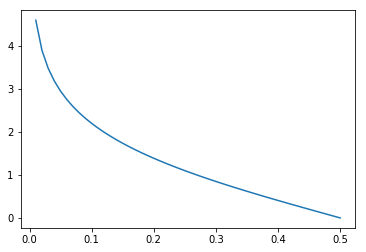

In [282]:
plt.plot(eps,wt)